In [11]:
import pandas as pd
import seaborn as sns

In [13]:
df = pd.read_csv('Churn_Modelling.csv')

In [15]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [19]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [21]:
x = df[['CreditScore','Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary']]

In [23]:
y = df['Exited']

<Axes: xlabel='Exited', ylabel='count'>

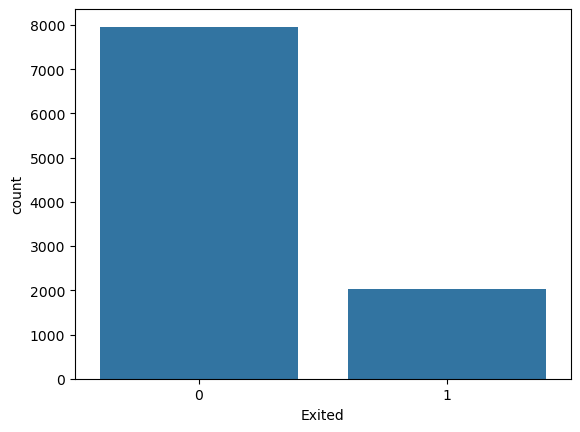

In [25]:
sns.countplot(x=y)

In [27]:
y.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [29]:
from sklearn.preprocessing import StandardScaler

In [31]:
scaler= StandardScaler()

In [33]:
x_scaled = scaler.fit_transform(x)

In [37]:
from sklearn.model_selection import train_test_split

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, random_state=0, test_size=0.20)

In [43]:
x_scaled.shape

(10000, 8)

In [45]:
x_train.shape

(8000, 8)

In [47]:
from sklearn.neural_network import MLPClassifier

In [49]:
ann = MLPClassifier(hidden_layer_sizes= (100,100,100),random_state=0, max_iter=100, activation='relu')

In [51]:
ann.fit(x_train, y_train)

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=100, random_state=0)

In [53]:
y_pred = ann.predict(x_test)

In [55]:
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, classification_report

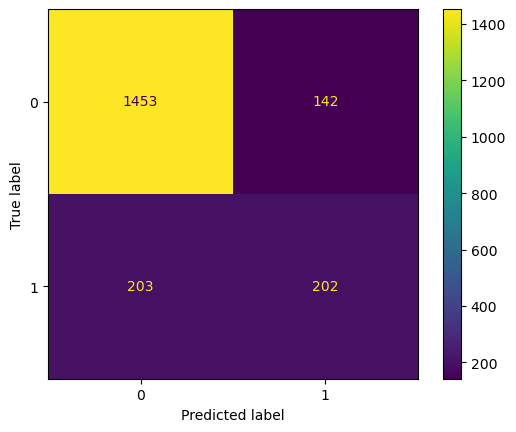

In [59]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [61]:
accuracy_score(y_test,y_pred)

0.8275

In [65]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89      1595
           1       0.59      0.50      0.54       405

    accuracy                           0.83      2000
   macro avg       0.73      0.70      0.72      2000
weighted avg       0.82      0.83      0.82      2000



In [67]:
!pip install imbalanced-learn

In [71]:
from imblearn.over_sampling import RandomOverSampler

In [73]:
ros = RandomOverSampler(random_state=0)

In [75]:
x_res, y_res = ros.fit_resample(x,y)

In [77]:
x_res.shape

(15926, 8)

In [81]:
y_res.value_counts()

Exited
1    7963
0    7963
Name: count, dtype: int64

In [83]:
x_scaled = scaler.fit_transform(x_res)

In [85]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_res, random_state=0, test_size=0.20)

In [87]:
ann = MLPClassifier(hidden_layer_sizes= (100,100,100),random_state=0, max_iter=100, activation='relu')

In [89]:
ann.fit(x_train, y_train)

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=100, random_state=0)

In [90]:
y_pred = ann.predict(x_test)

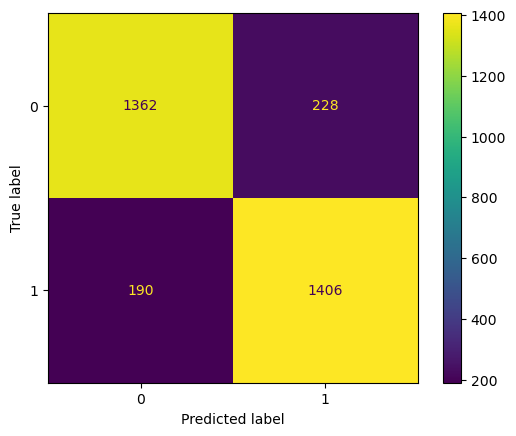

In [91]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [95]:
accuracy_score(y_test,y_pred)

0.8688010043942247

In [97]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87      1590
           1       0.86      0.88      0.87      1596

    accuracy                           0.87      3186
   macro avg       0.87      0.87      0.87      3186
weighted avg       0.87      0.87      0.87      3186

